In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import streamlit as st
import yfinance as yf


In [4]:
salary = pd.read_csv("salary2 - Dataset09-Employee-salary-prediction.csv (1).csv")

In [5]:
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Rating,seniority
0,32,Male,Bachelor's,Software Engineer,5.0,90000,3.8,na
1,28,Female,Master's,Data Analyst,3.0,65000,3.4,na
2,45,Male,PhD,Senior Manager,15.0,150000,4.8,na
3,36,Female,Bachelor's,Sales Associate,7.0,60000,3.8,na
4,52,Male,Master's,Director,20.0,200000,2.9,na


In [6]:
salary.shape

(375, 8)

In [7]:
salary = salary.drop_duplicates (keep = 'first')

In [8]:
salary.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Rating                 0
seniority              0
dtype: int64

In [9]:
salary.dropna (how = 'any', inplace=True)

In [10]:
salary.shape

(373, 8)

In [11]:
salary.describe()

,Age,Years of Experience,Salary,Rating
count,373.000000,373.000000,373.000000,373.000000
mean,37.415550,10.013405,100358.847185,3.687131
std,7.081437,6.571041,48494.660520,0.746062
min,23.000000,0.000000,350.000000,-1.000000
25%,31.000000,4.000000,55000.000000,3.400000
50%,36.000000,9.000000,95000.000000,3.800000
75%,44.000000,15.000000,140000.000000,4.100000
max,53.000000,25.000000,250000.000000,5.000000


In [12]:
corr= salary[['Age','Years of Experience','Salary','Rating']].corr()
corr

,Age,Years of Experience,Salary,Rating
Age,1.000000,0.979195,0.921991,-0.037859
Years of Experience,0.979195,1.000000,0.930183,-0.045943
Salary,0.921991,0.930183,1.000000,-0.084611
Rating,-0.037859,-0.045943,-0.084611,1.000000


In [13]:
sns.heatmap(corr, annot =True)

<Axes: >

In [14]:
salary['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [15]:
salary['Education Level'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Education Level'>

In [16]:
salary['Gender'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Gender'>

In [17]:
 salary['Job Title'].value_counts()

Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Manager            9
Senior Marketing Analyst            8
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

In [18]:
salary.Age.plot(kind = 'hist')


<Axes: ylabel='Frequency'>

In [19]:
salary.Age.plot(kind = 'box')

<Axes: ylabel='Frequency'>

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
 Label_Encoder = LabelEncoder()

In [22]:
salary['Gender_Encode'] = Label_Encoder.fit_transform(salary['Gender'])

In [23]:
 salary['Degree_Encode'] = Label_Encoder.fit_transform(salary ['Education Level'])

In [24]:
salary['Job_Title_Encode'] = Label_Encoder.fit_transform(salary['Job Title'])

In [25]:
salary['seniority_Encode'] = Label_Encoder.fit_transform(salary['seniority'])

In [26]:
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Rating,seniority,Gender_Encode,Degree_Encode,Job_Title_Encode,seniority_Encode
0,32,Male,Bachelor's,Software Engineer,5.0,90000,3.8,na,1,0,159,1
1,28,Female,Master's,Data Analyst,3.0,65000,3.4,na,0,1,17,1
2,45,Male,PhD,Senior Manager,15.0,150000,4.8,na,1,2,130,1
3,36,Female,Bachelor's,Sales Associate,7.0,60000,3.8,na,0,0,101,1
4,52,Male,Master's,Director,20.0,200000,2.9,na,1,1,22,1


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
 std_scaler= StandardScaler()

In [29]:
salary['Age_scaled'] = std_scaler.fit_transform(salary[['Age']])

In [30]:
salary['Experience_years_scaled'] = std_scaler.fit_transform(salary [['Years of Experience']])

In [31]:
salary['Rating_scaled'] = std_scaler.fit_transform(salary[['Rating']])

In [32]:
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Rating,seniority,Gender_Encode,Degree_Encode,Job_Title_Encode,seniority_Encode,Age_scaled,Experience_years_scaled,Rating_scaled
0,32,Male,Bachelor's,Software Engineer,5.0,90000,3.8,na,1,0,159,1,-0.765780,-0.763979,0.151489
1,28,Female,Master's,Data Analyst,3.0,65000,3.4,na,0,1,17,1,-1.331396,-1.068754,-0.385380
2,45,Male,PhD,Senior Manager,15.0,150000,4.8,na,1,2,130,1,1.072471,0.759894,1.493661
3,36,Female,Bachelor's,Sales Associate,7.0,60000,3.8,na,0,0,101,1,-0.200164,-0.459205,0.151489
4,52,Male,Master's,Director,20.0,200000,2.9,na,1,1,22,1,2.062299,1.521830,-1.056466


In [33]:
X=salary[['Age_scaled', 'Experience_years_scaled','Rating_scaled','Gender_Encode','Degree_Encode','Job_Title_Encode','seniority_Encode']]
y=salary['Salary']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
linmodel =  LinearRegression()
linmodel.fit(X_train,y_train)

LinearRegression()

In [38]:
predictions = linmodel.predict(X_test)
predictions

array([ 99341.07955625,  28752.25602937,  54985.65885942,  50863.21308112,
        57745.57247049,  41861.92971006,  48996.12519921,  44852.93631037,
       181550.35285743, 114268.85327221, 164290.31022537, 116562.93974838,
        54013.72956049, 167990.79581918, 154912.0117219 ,  86105.71313143,
        45499.06251932,  52079.48098962,  30625.4848926 ,  44375.83161455,
       134138.07303351, 180211.07999137,  41740.07894426, 102872.97766512,
        88694.58005371, 120649.9700302 , 133441.16589425,  99783.25547254,
        42482.29568956, 104502.97009957, 151482.15273769,  58140.3645207 ,
        65079.46482982,  90629.26415814,  57004.28719461,  63107.80515502,
       184457.33755378, 162654.37543795,  77763.94808274,  61576.44216049,
       180289.81629293, 166037.31362678, 163851.62877607,  55219.81482324,
       101417.01326882, 141989.4494059 ,  72901.77899857, 178115.66307465,
       167169.32461144,  76749.20261721,  85917.79336234,  67685.24377021,
        89305.35890814, 1

In [39]:
df = pd.DataFrame({'y_Actual' :y_test, 'y_Predicted': predictions })

In [40]:
df

,y_Actual,y_Predicted
169,105000,99341.079556
38,40000,28752.256029
89,55000,54985.658859
168,50000,50863.213081
235,45000,57745.572470
...,...,...
363,70000,69941.071868
90,120000,126640.251380
347,180000,157692.440946
78,180000,160004.745969


In [41]:
df['Error'] = df['y_Actual'] -df['y_Predicted']

In [42]:
df

,y_Actual,y_Predicted,Error
169,105000,99341.079556,5658.920444
38,40000,28752.256029,11247.743971
89,55000,54985.658859,14.341141
168,50000,50863.213081,-863.213081
235,45000,57745.572470,-12745.572470
...,...,...,...
363,70000,69941.071868,58.928132
90,120000,126640.251380,-6640.251380
347,180000,157692.440946,22307.559054
78,180000,160004.745969,19995.254031


In [43]:
df['abs_error'] = abs(df['Error'])
Mean_absolute_Error = df['abs_error'].mean()
Mean_absolute_Error

11165.603103143849

In [ ]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
r2_score(y_test, predictions)

0.9182354720831766

In [46]:
print(f'Accuracy of the model ={ round(r2_score(y_test, predictions), 4)*100} %')

Accuracy of the model =91.82000000000001 %


In [47]:
linmodel.coef_

array([18897.84700068, 19485.14948493, -2388.80441999,  8970.50663758,
       15487.36371597,    32.84161299,   935.55486382])

In [48]:
linmodel.intercept_

83024.08586768893

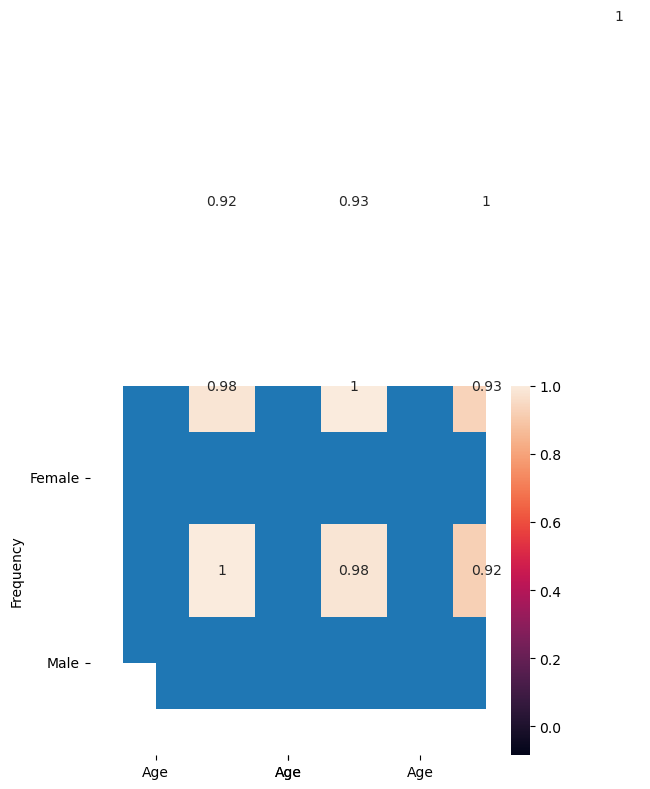

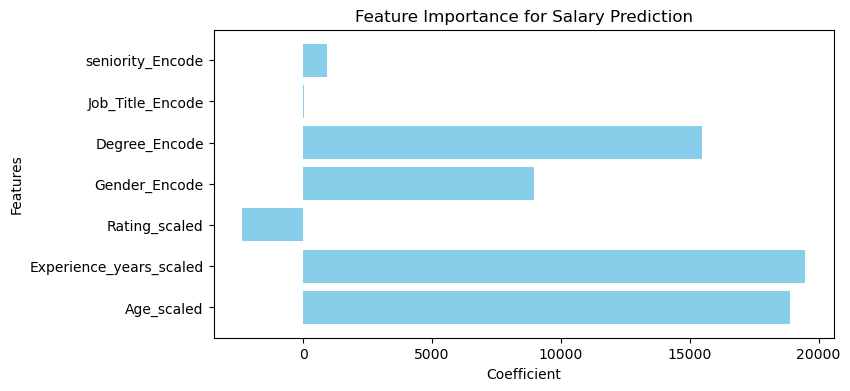

In [49]:


coefficients = linmodel.coef_
features = X.columns

plt.figure(figsize=(8, 4))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Feature Importance for Salary Prediction')
plt.show()